#### Author: Wade Bryson
#### GitHub: https://github.com/WadeBryson
#### Class: 44-608 Data Analytics Fundamentals
#### Module 6 Project 6: Tell Your Own Story with Data

# **<p style="text-align: center;">North Andrew Boys Basketball</p>**
### *<p style="text-align: center;">An Analysis of the Impact of the Post-Hudl Era Statistics</p>*
***

## **North Andrew Background Information**

<img align="right" width="125" height="125" src="https://static.hudl.com/users/temp/5021822_b3d38657e36a4706b8bff82999688cdc.gif">

#### North Andrew is a small school district located along Highway 71 at Rosendale, MO. North Andrew’s constituents live in the small towns of Bolckow, Rosendale, Fillmore, and their surrounding rural areas. North Andrew’s Boys Basketball program has season statistics dating back to 1967. North Andrew kept primitive, basic stats for years but their ability to keep and analyze their stats improved dramatically in the 2014-2015 season when they purchased Hudl. Hudl is a subscription based service that ties real time data analysis with video footage and produces advanced statistics that are easily accessible. With all of this information readily available, high school programs that have found ways to read, analyze, and then implement strategies using their statistics have thrived.



## **Part 1 - Initial Look at Data Set**

#### For years North Andrew only kept track of points scored, three pointers made, and free throws. Now, with help from Hudl, we keep track of all kinds of different statistics. Let’s take a look at the Post-Hudl Era Database below.

In [3]:
import pandas as pd
Hudl_Era = pd.read_csv('Post_Hudl_Era_Stats.csv')

# By default pandas only shows a few columns on the right and a few at the end. We want to change the default settings so it shows all columns.
pd.set_option('display.max_columns', None)
Hudl_Era.head(7)

,Athletes,Year,Grade,GP,eFG%,VPS,FGM,FGA,FG%,2FGM,2FGA,2FG%,3FGM,3FGA,3FG%,FTM,FTA,FT%,PF,PPG,+/-,MINS,SCP,PiP,OREB,DREB,REB,AST,TO,A/TO,STL,BLK,FOUL,CHG
0,Tanner McDaniel,2020-2021,12th,32,0.61,1.30,273,528,0.52,177,271,0.65,96,257,0.37,95,122,0.78,737,23.0,319,946,82,306,36,78,114,88,114,0.77,66,9,69,0
1,Levi Linville,2018-2019,12th,25,0.69,1.90,175,254,0.69,175,253,0.69,0,1,0.00,92,146,0.63,442,17.7,349,584,122,346,110,86,196,30,40,0.75,39,9,64,1
2,Owen Graham,2021-2022,12th,28,0.50,1.69,187,379,0.49,186,367,0.51,1,12,0.08,89,145,0.61,464,16.6,109,861,99,356,97,257,354,113,93,1.22,26,96,68,0
3,Ryan Hughes,2016-2017,11th,31,0.58,1.90,101,215,0.47,54,113,0.48,47,102,0.46,82,100,0.82,331,10.7,285,376,26,90,12,38,50,145,54,2.69,45,3,25,1
4,Tanner McDaniel,2019-2020,11th,25,0.51,1.15,166,359,0.46,129,233,0.55,37,126,0.29,72,104,0.69,441,17.6,197,681,51,216,50,75,125,68,80,0.85,44,21,72,0
5,Braxon Linville,2021-2022,9th,26,0.51,1.12,104,213,0.49,96,192,0.50,8,21,0.38,67,110,0.61,283,10.9,144,746,49,192,80,79,159,49,78,0.63,23,0,53,1
6,Caleb Patterson,2016-2017,11th,29,0.60,1.66,153,259,0.59,151,254,0.59,2,5,0.40,60,97,0.62,368,12.7,308,350,111,292,96,109,205,36,30,1.20,33,17,71,2


In [4]:
# Displaying the amount of athletes in the Database (# Rows)
numb_athletes = len(Hudl_Era)
print ("Number of Athletes:", numb_athletes)

# Displaying the amount of columns in the Database
numb_columns = len(Hudl_Era.columns)
print ("Number of Columns:", numb_columns)

Number of Athletes: 144
Number of Columns: 34


#### The Post-Hudl Era Database has three columns containing categorical information about a player; their name, the year, and their grade. It also has 31 columns containing different numeric statistics accumulated throughout the season. This drastic increase in information available has forever changed the North Andrew Boys’ Basketball Program.

## **Part 2 - Impact of Modern Statistics**

### **Value Points System (VPS)** 

#### Let’s now dive into some of the new advanced statistics that we track. The first one we will focus on is the Value Points System, “VPS”. The Value Points System gives points for statistics that are widely accepted as being positive outcomes (Points + Rebounds + 2*(Assists + Charges + Steals + Blocks)). It then divides this number by a number that gives points for negative statistics (FT Misses + 2*(Misses + Fouls + Turnovers)). With this formula a VPS of 1 is considered average. Let’s look at some basic statistics with the North Andrew Boys’ Basketball Program and our VPS.

In [5]:
# Setting the precision to 2 decimal places
pd.set_option("display.precision", 2)

Hudl_Era['VPS'].describe()

count    144.00
mean       1.20
std        0.96
min        0.00
25%        0.88
50%        1.12
75%        1.37
max        9.00
Name: VPS, dtype: float64

#### As with most statistics, there are some flaws with the Value Points System. Athletes that play very little minutes can really have their VPS score inflated. Overall, both of our mean and median are pretty significantly above the standardized average of 1.0 which is really good.


### **Effective Field Goal Percentage (eFG%)**

#### At North Andrew, we **LOVE** the 3-Point Shot. Let’s take a look at our individual 3-point shooting totals.

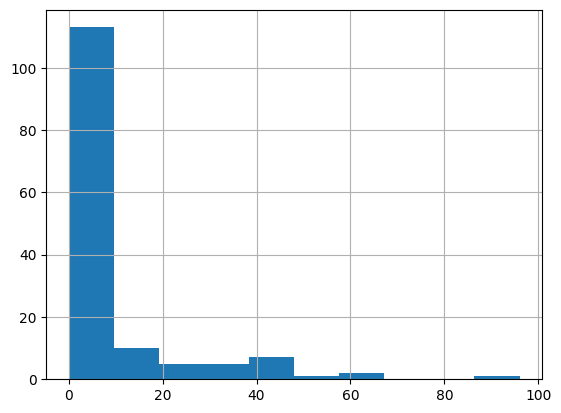

In [6]:
%matplotlib inline
histogram = Hudl_Era["3FGM"].hist()

#### Notice that a majority of our athletes don't make a large amount of 3s, but the ones that do are making them at a very high rate. There are all kinds of studies out there that prove the value of the 3-point shot to your basketball program and I won't spend a whole bunch of time elaborating on it. But they all break down to the following fact: Shooting a 3 at 33.3% is equivalent in points per shot to shooting a 2 at 50%. This leads me to another advanced statistic that I love, **eFG%**. **Effective Field Goal Percentage** takes into account that a 3-point shot is worth more than a 2-point shot and it adjusts the percent to accomodate for that. Let's look at the best season long eFG% from our athletes in the Post-Hudl Era.

In [7]:
# Filter athletes out that took less than 15 shots. If we don't do this the last will be dominated by Freshman that went 2 for 2 on the year.
eFG_Filtered = Hudl_Era[Hudl_Era['FGA']>= 15]

clean_eFG = eFG_Filtered[["Athletes", "Year", "Grade", "PPG", "eFG%", "FG%", "2FG%", "3FG%"]]
clean_eFG.nlargest(10, 'eFG%')

,Athletes,Year,Grade,PPG,eFG%,FG%,2FG%,3FG%
1,Levi Linville,2018-2019,12th,17.7,0.69,0.69,0.69,0.00
56,Levi Linville,2017-2018,11th,2.6,0.66,0.66,0.66,0.00
60,Levi Linville,2016-2017,10th,2.5,0.65,0.65,0.65,0.00
17,Aidan DeLong,2016-2017,11th,11.7,0.63,0.62,0.63,0.40
47,Ryan Shultz,2017-2018,12th,4.0,0.62,0.60,0.62,0.38
67,Keenan Shunk,2018-2019,11th,2.1,0.62,0.62,0.73,0.00
0,Tanner McDaniel,2020-2021,12th,23.0,0.61,0.52,0.65,0.37
13,Lance Streeby,2017-2018,12th,11.1,0.61,0.52,0.64,0.39
6,Caleb Patterson,2016-2017,11th,12.7,0.60,0.59,0.59,0.40
11,Ryan Hughes,2017-2018,12th,9.7,0.60,0.49,0.53,0.44


#### Any eFG% over 0.50 is considered really good for the high school level. The higher your effective field goal percentage, the more shots we want you to take. 

### **Plus/Minus (+/-)**

#### Now let's take a look at **MY FAVORITE** stat, plus-minus. Plus-minus is an integer that represents the score differential while an athlete was on the court. At the small school level, it is not realistic for us to expect every single athlete to be a great scorer, rebounder, or ball handler. But we do expect every athlete to compete and the plus-minus stat is purely a representation of how much we outscored or got outscored while that player was on the floor. Let’s look at the top 10 plus-minus values with North Andrew Boys’ Basketball Program during the Post-Hudl Era.

In [8]:
clean_PM = Hudl_Era[["Athletes", "Year", "Grade", "+/-"]]
clean_PM.nlargest(10, '+/-')

,Athletes,Year,Grade,+/-
11,Ryan Hughes,2017-2018,12th,613
7,Caleb Patterson,2017-2018,12th,583
19,Jacob Powelson,2017-2018,12th,533
13,Lance Streeby,2017-2018,12th,530
40,Cole Thorburn,2017-2018,12th,394
38,Drake Simmons,2018-2019,12th,390
1,Levi Linville,2018-2019,12th,349
53,Aidan DeLong,2017-2018,12th,343
47,Ryan Shultz,2017-2018,12th,339
44,Jaden Baker,2018-2019,11th,321


#### One of the best things about the +/- stat is that it is not heavily swayed by a small sample size unlike several of our other statistics we measure. Notice how 7 of the top 10 values all happened from athletes in the 2017-2018 season. That team had the best record in North Andrew History (29-1). They finished 3rd at the Class 1 Final Four.

<img align="center" width="921" height="483" src="2018-2019.jpg">


#### We've looked at VPS, eFG%, and PLus-Minus as a statistic after the season completes. I cannot overstate how important those stats are to our coaching staff in real time during the season. We call all of these advanced statistics "Winning Statistics". When we are making playing time or personnel decisions we heavily rely on these "Winning Statistics".

## **Part 3 - Deep Dive into Plus/Minus**

#### In any team sport the most important statistic is whether or not you won the contest. We’ve got multiple stats that we call “Winning Stats”, but the one stat that we keep that resembles winning the closest is **Plus/Minus**. Let’s run a correlation test with every variable in our database and analyze their correlation with the Plus/Minus statistic.

Text(0.5, 1.0, 'Statistics Correlating with +/-')

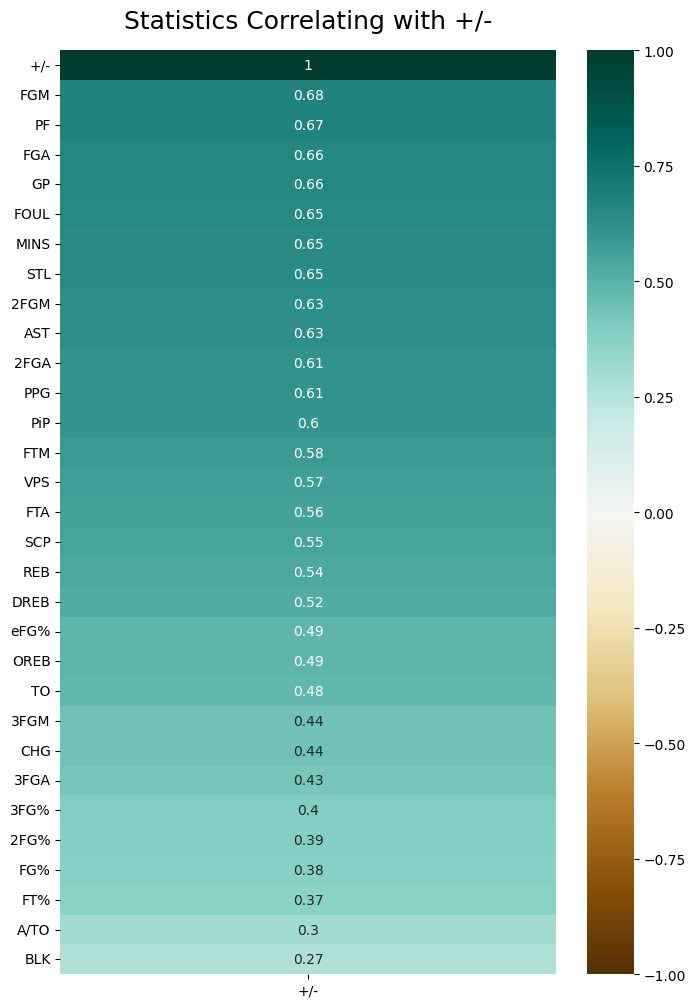

In [9]:
# Found this code on: https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
# Importing libraries needed for heat map
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# I am using the filtered DataFrame we created earlier. The Correlations were very different and random when I ran it through the full Dataset.
# I need to filter the three string columns out of the DataFrame so we can run the correlation test.
corr_Hudl_Era = eFG_Filtered.drop(['Athletes', 'Year', 'Grade'], axis=1)

plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(corr_Hudl_Era.corr()[['+/-']].sort_values(by='+/-', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Statistics Correlating with +/-', fontdict={'fontsize':18}, pad=16)

#### Almost all of the statistics have a weak or moderate correlation with +/-. Anything above 0.6 shows a slight correlation but I would like the values to be above 0.7 before I would call it strong. This is not surprising considering there are so many different factors that impact the score of a basketball game and that we have a really small dataset. I would be interested to see what the results would be if we were able to combine our dataset with every other team in the state's information. 

## **Part 4 - Individual Leaderboards**

#### Another focus we have with our Post-Hudl Era Database is creating a top 10 leaderboard for all of the tracked statistics. This allows for more school records and positive individual statistics for our athletes to strive for. Let’s take a look at our top 10 leaderboard for Three Pointers Made in a season.

In [10]:
clean_3FGM = Hudl_Era[["Athletes", "Year", "Grade", "3FGM"]]
clean_3FGM.nlargest(10, '3FGM')

,Athletes,Year,Grade,3FGM
0,Tanner McDaniel,2020-2021,12th,96
16,Hayden Ecker,2021-2022,11th,62
26,Hayden Ecker,2022-2023,12th,61
10,Jaden Baker,2019-2020,12th,55
3,Ryan Hughes,2016-2017,11th,47
19,Jacob Powelson,2017-2018,12th,47
11,Ryan Hughes,2017-2018,12th,43
13,Lance Streeby,2017-2018,12th,42
18,Jacob Powelson,2015-2016,10th,42
25,Jacob Powelson,2014-2015,9th,42


#### Tanner's 2020-2021 season was really special. He was an elite scorer and had unselfish teammates that took pride in getting him open looks. They went on a "Cinderalla" run and finished 4th at the Class 2 Final Four. We constantly talk with our athletes about the records from the past they are chasing and how close they are to being on the leaderboard. I have the process we use to promote that mindset below.

In [11]:
def new_function(threes):
    if(threes > 96):
        print('Congratulations! You now have the record for most three pointers made in a season!!!')
    elif(threes >= 42):
        print('Congratulations! You have now made it into the top 10!')
    else:
        print('You are not quite there yet. Keep working!')

print('How many threes have you made so far? 37')    
new_function(37)

How many threes have you made so far? 37
You are not quite there yet. Keep working!


## **Part 5 - Conclusion**

#### The purchase of Hudl in the 2014-2015 HS Basketball Season has completely changed our program’s ability to track, analyze, and respond to statistics on a daily basis. Whether you look at our playstyle, our player development plans, in game coaching strategies, or anywhere in between you will see the impact that modern statistics have made on our program. But as every good coach knows, us coaches are nothing without having players that believe in us, each other, and themselves. I owe a big **THANK YOU** to everyone listed below who made this possible!

In [16]:
duplicates_name_list = Hudl_Era['Athletes'].tolist()
set_name = set(duplicates_name_list)
sorted_names = sorted(set_name)

print(sorted_names)

['Aidan DeLong', 'Aiden Miller', 'Andrew Goff', 'Ben Roller', 'Blaise Patterson', 'Braxon Linville', 'Brent Windsor', 'Brewer Wheeler', 'Cade Thomas', 'Caden Patterson', 'Caleb Patterson', 'Carson Thomas', 'Christian Patterson', 'Clay White', 'Clayton Linville', 'Cole Thorburn', 'Collin Patterson', 'Couper Simmons', 'Dawson Mercer', 'Derek Mercer', 'Deryk Goff', 'Drake Simmons', 'Grant Lassen', 'Gunnar Rutherford', 'Gunner Hughes', 'Gunner Lawrence', 'Hayden Ecker', 'Hunter Lee', 'Jacob Chittum', 'Jacob Kerns', 'Jacob Powelson', 'Jaden Baker', 'Jarom Russo', 'Jasper Shunk', 'Keaton Hannah', 'Keenan Shunk', 'Khizer Shunk', 'Koven Ehrhardt', 'Kyle Houston', 'Lance Streeby', 'Lane Schuman', 'Levi Linville', 'Lex Shackelford', 'Logan Wilmes', 'Mason Nester', 'Matthew Evans', 'McKinley Lillard', 'Mitchell Officer', 'Newton Shunk', 'Nic Crets', 'Owen Graham', 'Owen Lassen', 'Payton Simmons', 'Ryan Hughes', 'Ryan Shultz', 'Ryan Wilmes', 'Spencer Kuykendall', 'Tanner McDaniel', 'Trevor Madison

<img align="center" width="913" height="384" src="Champs.jpg">

#### If you made it this far, THANK YOU! Whether you are a fellow basketball coach or a data analyst, our professions are easier when you have peers to collaborate with. Feel free to reach out to me if you have any questions about our implementation of advanced statistics or this dataset. I’d also be more than willing to talk about other ideas that you have or things you have done with your teams.

#### Author: Wade Bryson
#### Email: wbryson@northandrew.org